# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
import json
import os
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
temp = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
city_data = []
counter = 0
for city in cities[:600]:
    url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    counter = counter +1
    try:
        country = weather_json['sys']['country']
        lat = weather_json['coord']['lat']
        lng = weather_json['coord']['lon']
        humidity = weather_json['main']['humidity']
        wind_speed = weather_json['wind']['speed']
        clouds = weather_json['clouds']['all']
        max_temp = weather_json['main']['temp_max']
        date = weather_json['dt']
        city_data.append([city, country, lat, lng, max_temp, humidity, clouds, wind_speed, date])
        time.sleep(.5)
    except:
        print("data not found")
        
    #print(f"The weather API responded with: {weather_json}.")
    #print(json.dumps(weather_json, indent=4, sort_keys=True))

data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found
data not found


In [40]:
city_df = pd.DataFrame(city_data, columns=[
    "city", 
    "country", 
    "lat", 
    "lng", 
    "max_temp", 
    "humidity", 
    "clouds", 
    "wind_speed", 
    "date"
])
city_df

,city,country,lat,lng,max_temp,humidity,clouds,wind_speed,date
0,busselton,AU,-33.6500,115.3333,285.93,95,39,5.61,1611697788
1,xichang,CN,27.8964,102.2634,277.10,72,0,0.60,1611697789
2,pagudpud,PH,18.5616,120.7868,295.15,94,75,7.17,1611697789
3,klyuchi,RU,52.2667,79.1667,270.25,98,99,6.27,1611697790
4,rikitea,PF,-23.1203,-134.9692,299.86,70,64,4.87,1611697790
...,...,...,...,...,...,...,...,...,...
538,dukat,RU,62.5500,155.5500,238.81,83,100,1.93,1611698154
539,irece,BR,-11.3042,-41.8558,297.97,53,42,6.88,1611698155
540,roald,NO,62.5833,6.1333,273.15,93,75,3.09,1611698156
541,rio gallegos,AR,-51.6226,-69.2181,286.15,24,40,13.89,1611698156


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [41]:
city_df

,city,country,lat,lng,max_temp,humidity,clouds,wind_speed,date
0,busselton,AU,-33.6500,115.3333,285.93,95,39,5.61,1611697788
1,xichang,CN,27.8964,102.2634,277.10,72,0,0.60,1611697789
2,pagudpud,PH,18.5616,120.7868,295.15,94,75,7.17,1611697789
3,klyuchi,RU,52.2667,79.1667,270.25,98,99,6.27,1611697790
4,rikitea,PF,-23.1203,-134.9692,299.86,70,64,4.87,1611697790
...,...,...,...,...,...,...,...,...,...
538,dukat,RU,62.5500,155.5500,238.81,83,100,1.93,1611698154
539,irece,BR,-11.3042,-41.8558,297.97,53,42,6.88,1611698155
540,roald,NO,62.5833,6.1333,273.15,93,75,3.09,1611698156
541,rio gallegos,AR,-51.6226,-69.2181,286.15,24,40,13.89,1611698156


In [45]:
city_df.to_csv("output_data/cities.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [55]:
#  Get the indices of cities that have humidity over 100%.


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

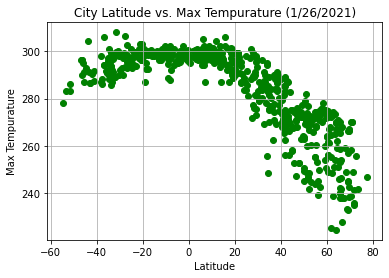

In [71]:
plt.scatter(city_df['lat'], city_df['max_temp'], color="g")
plt.xlabel("Latitude")
plt.ylabel("Max Tempurature")
plt.title("City Latitude vs. Max Tempurature (1/26/2021)")
plt.grid(True)


## Latitude vs. Humidity Plot

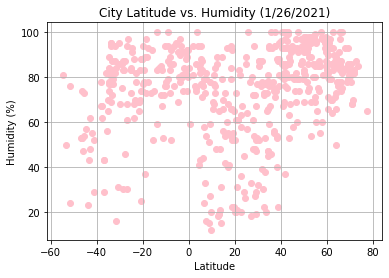

In [63]:
plt.scatter(city_df['lat'], city_df['humidity'], color="pink")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (1/26/2021)")
plt.grid(True)

## Latitude vs. Cloudiness Plot

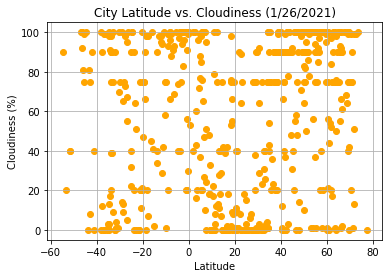

In [64]:
plt.scatter(city_df['lat'], city_df['clouds'], color="orange")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (1/26/2021)")
plt.grid(True)

## Latitude vs. Wind Speed Plot

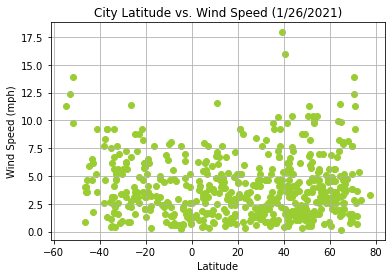

In [65]:
plt.scatter(city_df['lat'], city_df['wind_speed'], color="yellowgreen")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (1/26/2021)")
plt.grid(True)

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


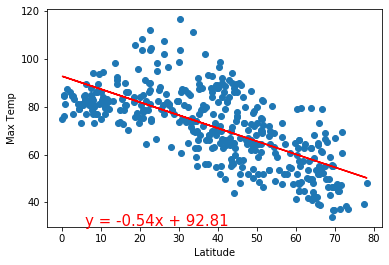

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


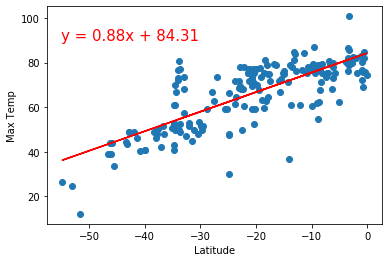

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


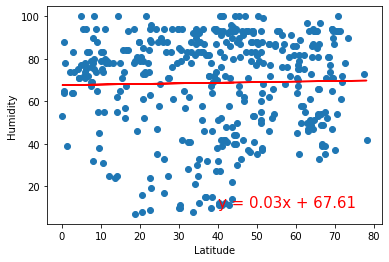

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


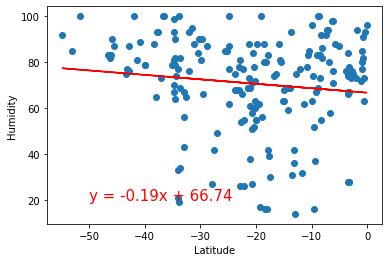

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


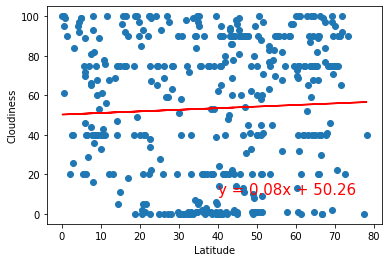

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


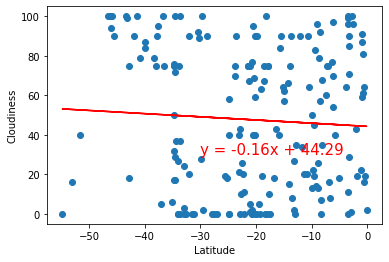

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


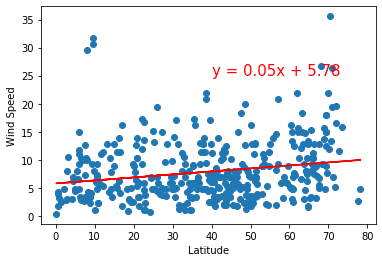

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


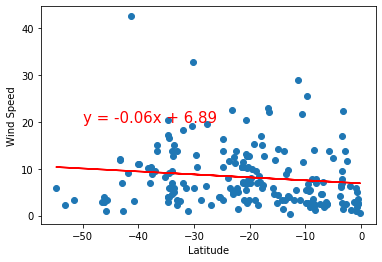